In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("customer_train.csv",sep=",")
df

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,3,11,0


# Data understanding

In [3]:
df.shape

(1680, 31)

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
df.drop(['Unnamed: 0.1'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.shape

(1680, 29)

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,27016.666667,43339.880952,2.338690,4.041071,2.670833,5.789286,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,41529.595304,51363.336472,1.966104,2.673427,2.972874,3.245504,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,32000.000000,54250.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Handling Missing Values

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.duplicated().sum()

0

Data Feature 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1663 non-null   int64  
 1   Year_Birth           1663 non-null   int64  
 2   Education            1663 non-null   object 
 3   Marital_Status       1663 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1663 non-null   int64  
 6   Teenhome             1663 non-null   int64  
 7   Dt_Customer          1663 non-null   object 
 8   Recency              1663 non-null   int64  
 9   MntCoke              1663 non-null   int64  
 10  MntFruits            1663 non-null   int64  
 11  MntMeatProducts      1663 non-null   int64  
 12  MntFishProducts      1663 non-null   int64  
 13  MntSweetProducts     1663 non-null   int64  
 14  MntGoldProds         1663 non-null   int64  
 15  NumDealsPurchases    1663 non-null   int64 

In [14]:
# chenging the datatype of Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [15]:
print("The newest customer's enrolment date in the records:", max(df['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(df['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [16]:
#Create a column "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
df['Age'] = 2015 - df['Year_Birth']

In [17]:
#Create a column "Spent" indicating the total amount spent by the customer in various categories overthe span of two years.
df['Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [18]:
# Number of companies in which the client accepted the offer
df['No_Accepted_Cmp'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5'] + df['Response']


In [19]:
#Total number of purchases
df['No_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [20]:
df['Marital_Status'].value_counts()

Marital_Status
Menikah        644
Bertunangan    434
Lajang         353
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64

In [21]:
Marital_Status_mapping = {
    'Menikah': 0,
    'Bertunangan': 1,
    'Lajang': 2,
    'Cerai': 3,
    'Janda': 4,
    'Duda' : 5
}

df['Marital_Status'] = df['Marital_Status'].map(Marital_Status_mapping)

In [22]:
df['Education'].value_counts()

Education
S1     825
S3     369
S2     277
D3     157
SMA     35
Name: count, dtype: int64

In [23]:
education_mapping = {
    'S1': 0,
    'S3': 1,
    'S2': 2,
    'D3': 3,
    'SMA': 4
}

df['Education'] = df['Education'].map(education_mapping)

In [24]:
#Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
df['Children'] = df['Kidhome'] + df['Teenhome']

In [25]:
#To get further clarity of household, Creating feature indicating "Family_Size"
df['Family_Size'] = df['Marital_Status'] + df['Children']

In [26]:
#Create a feature "Is_Parent" to indicate parenthood status
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [27]:
#Dropping some of the redundant features
to_drop = ['ID','Year_Birth','Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
df = df.drop(to_drop, axis=1)

# Data Analysis and Visualization

In [28]:
df.shape

(1663, 30)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 1679
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1663 non-null   int64  
 1   Income               1663 non-null   float64
 2   Kidhome              1663 non-null   int64  
 3   Teenhome             1663 non-null   int64  
 4   Recency              1663 non-null   int64  
 5   MntCoke              1663 non-null   int64  
 6   MntFruits            1663 non-null   int64  
 7   MntMeatProducts      1663 non-null   int64  
 8   MntFishProducts      1663 non-null   int64  
 9   MntSweetProducts     1663 non-null   int64  
 10  MntGoldProds         1663 non-null   int64  
 11  NumDealsPurchases    1663 non-null   int64  
 12  NumWebPurchases      1663 non-null   int64  
 13  NumCatalogPurchases  1663 non-null   int64  
 14  NumStorePurchases    1663 non-null   int64  
 15  NumWebVisitsMonth    1663 non-null   int64 

In [30]:
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent
count,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,0.922429,5.201434e+07,0.449188,0.499098,49.061335,3.060469e+05,25978.352375,1.664546e+05,37110.042093,26979.555021,43331.328924,2.338545,4.038485,2.682502,5.797956,5.331930,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,0.145520,46.150932,6.059008e+05,0.435358,12.518942,0.948286,2.087192,0.710162
std,1.106537,2.148248e+07,0.544890,0.549449,28.914182,3.392420e+05,39576.041604,2.248949e+05,54348.868950,41273.567857,50904.197540,1.956260,2.616657,2.980317,3.245112,2.451058,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.352731,12.037325,6.027183e+05,0.879914,7.168639,0.759834,1.355196,0.453823
min,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,6.950000e+04,0.000000,6.000000,0.000000,1.000000,0.000000
50%,1.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,3.930000e+05,0.000000,12.000000,1.000000,2.000000,1.000000
75%,2.000000,6.812200e+07,1.000000,1.000000,74.000000,4.990000e+05,32000.000000,2.345000e+05,48000.000000,32000.000000,55000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.043500e+06,1.000000,18.000000,1.000000,3.000000,1.000000
max,4.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,198000.000000,262000.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2.525000e+06,5.000000,32.000000,3.000000,7.000000,1.000000


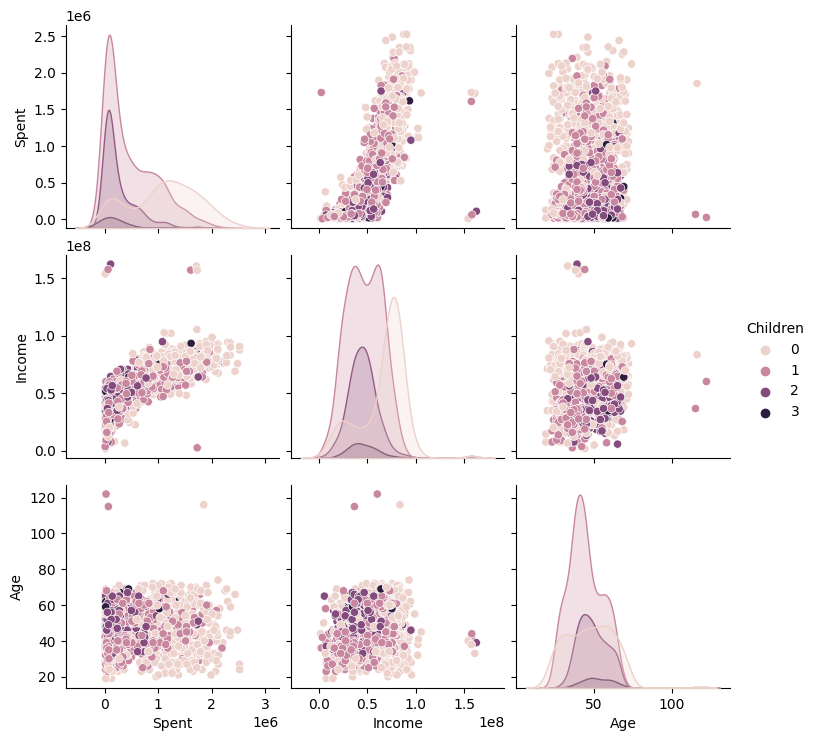

In [31]:
#Scatter plot between the variables
sns.pairplot(df,vars=['Spent','Income','Age'],hue='Children')
plt.show()


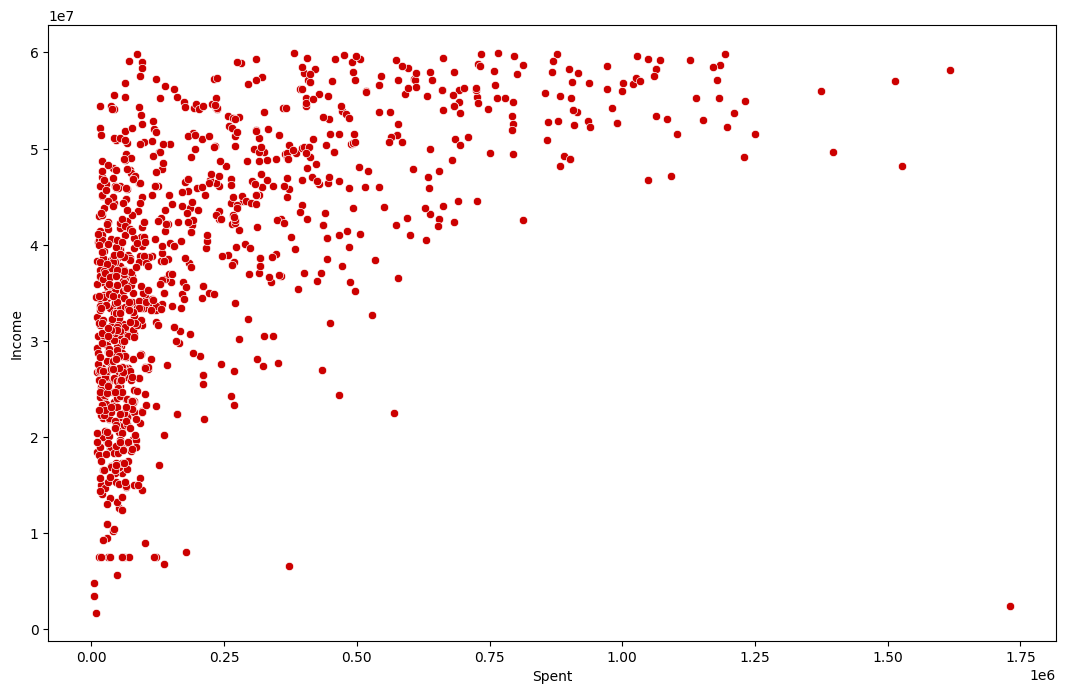

In [32]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df[df['Income']<60000000]['Spent'], y=df[df['Income']<60000000]['Income'], color='#cc0000');


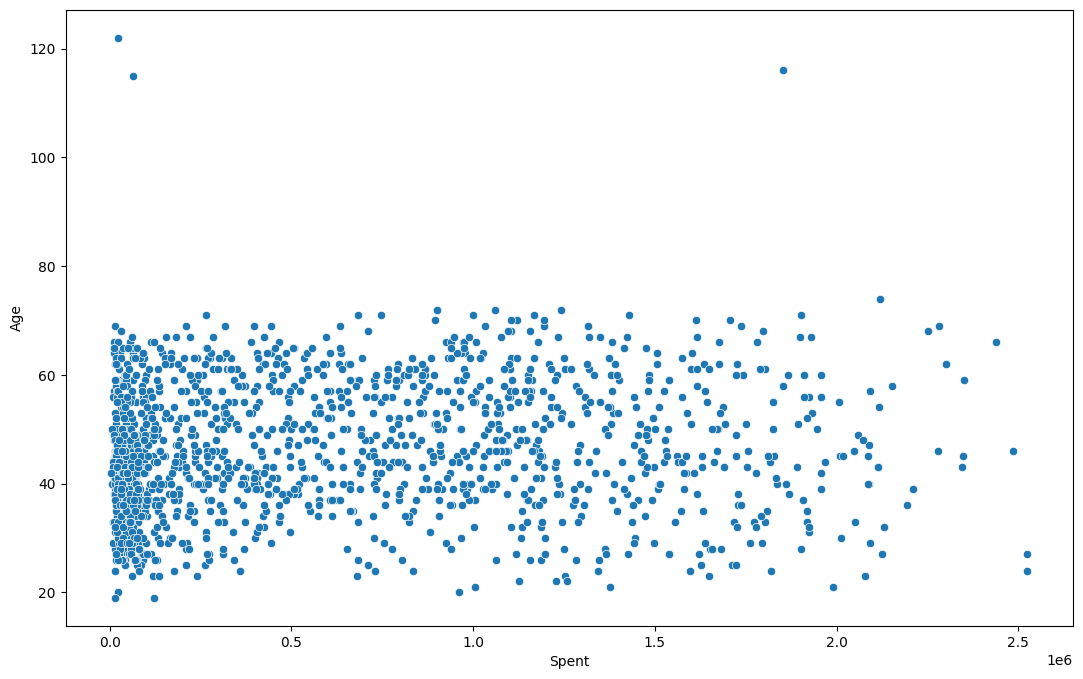

In [33]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Spent'], y=df['Age']);

<Axes: xlabel='Spent', ylabel='Count'>

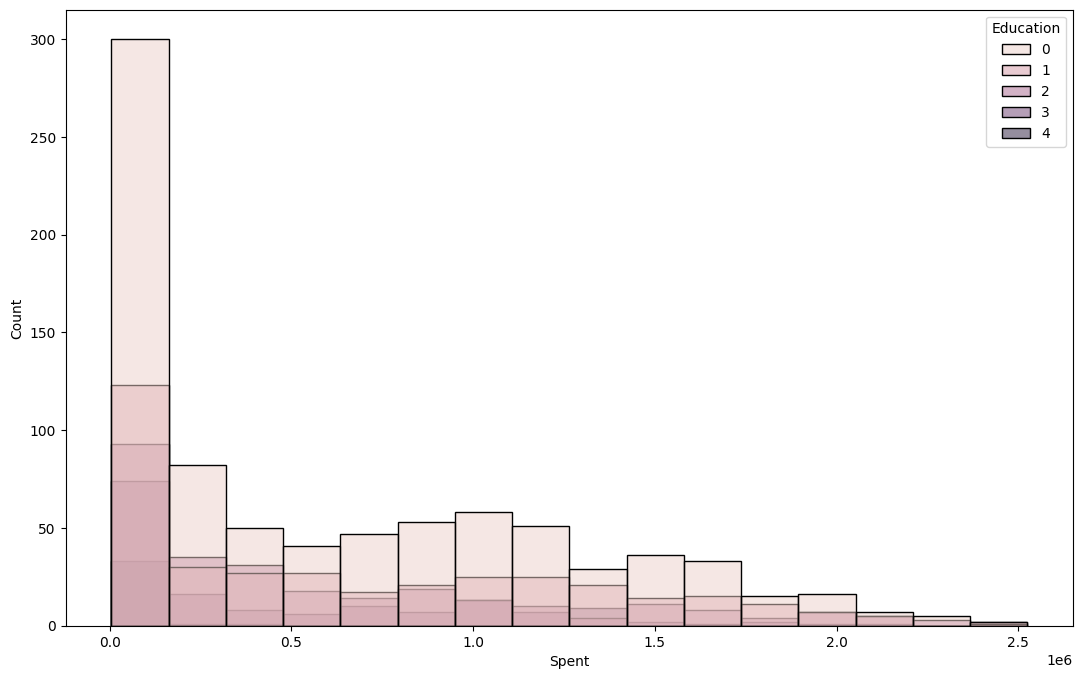

In [34]:
plt.figure(figsize=(13,8))
sns.histplot(x=df['Spent'], hue=df['Education'])

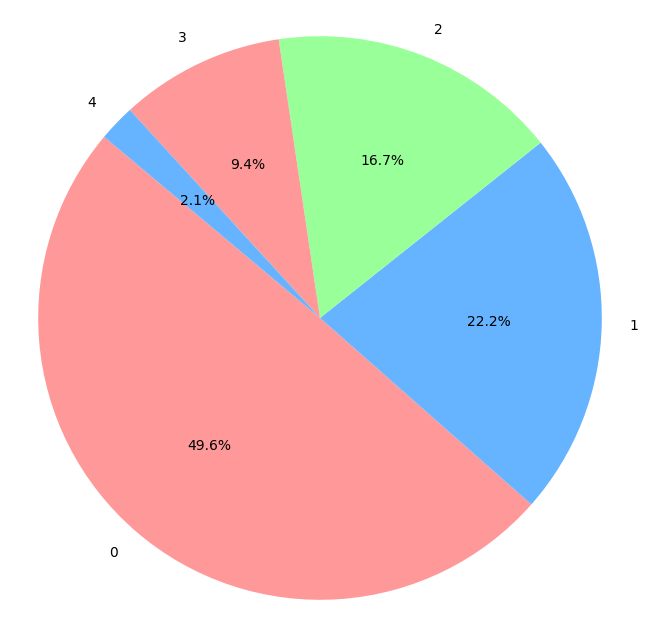

In [35]:
# Data to plot
education_counts = df['Education'].value_counts()
labels = education_counts.index
sizes = education_counts.values 

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.

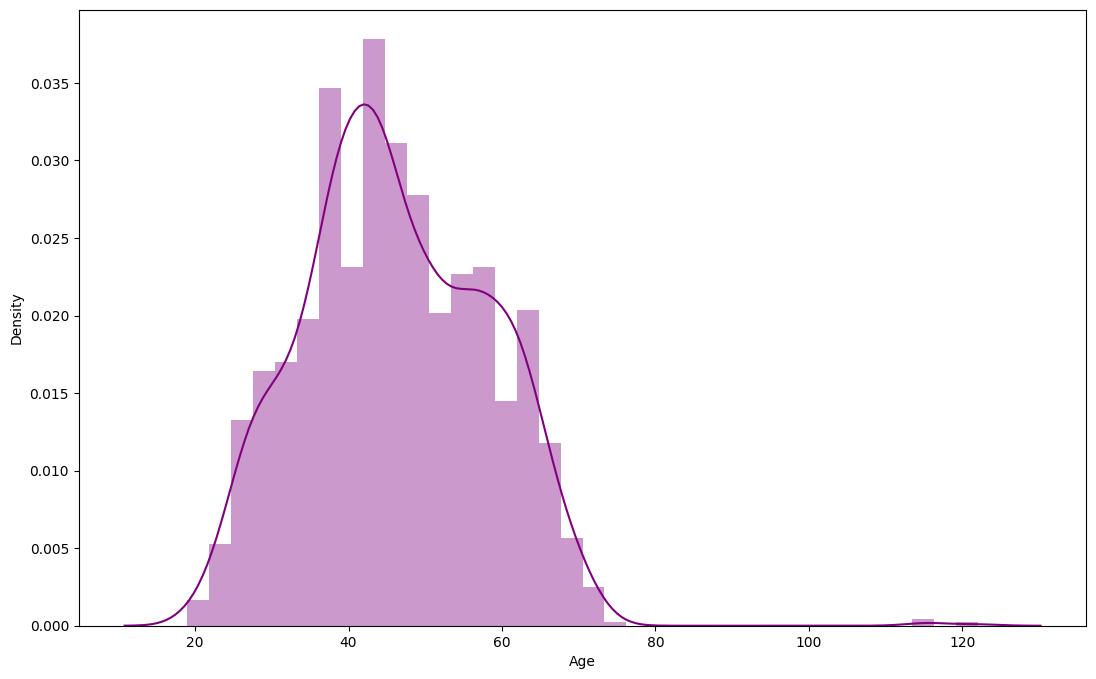

In [36]:
plt.figure(figsize=(13,8))
sns.distplot(df.Age, color='purple');

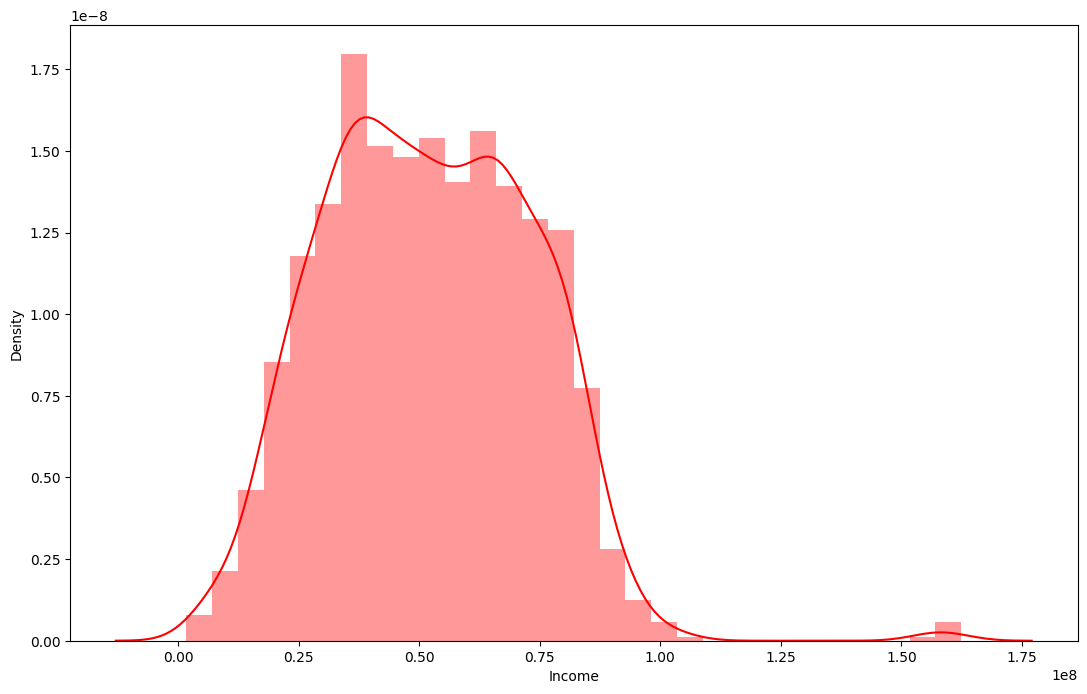

In [37]:
plt.figure(figsize=(13,8))
sns.distplot(df.Income, color='Red');

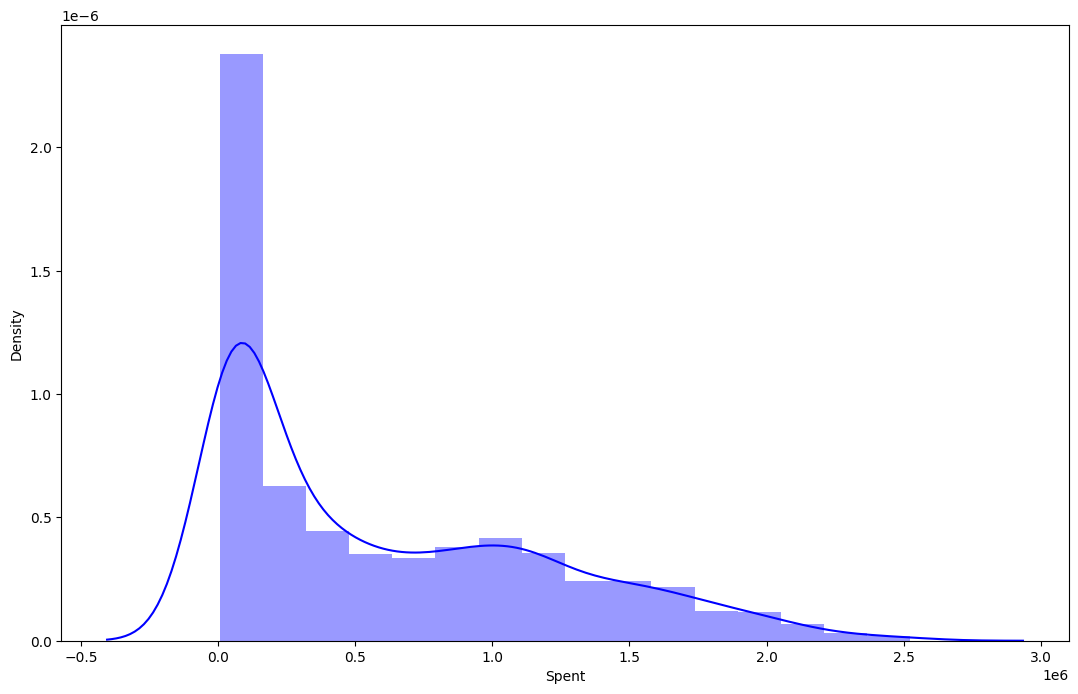

In [38]:
plt.figure(figsize=(13,8))
sns.distplot(df.Spent, color='Blue');

Feature relationship

<Axes: >

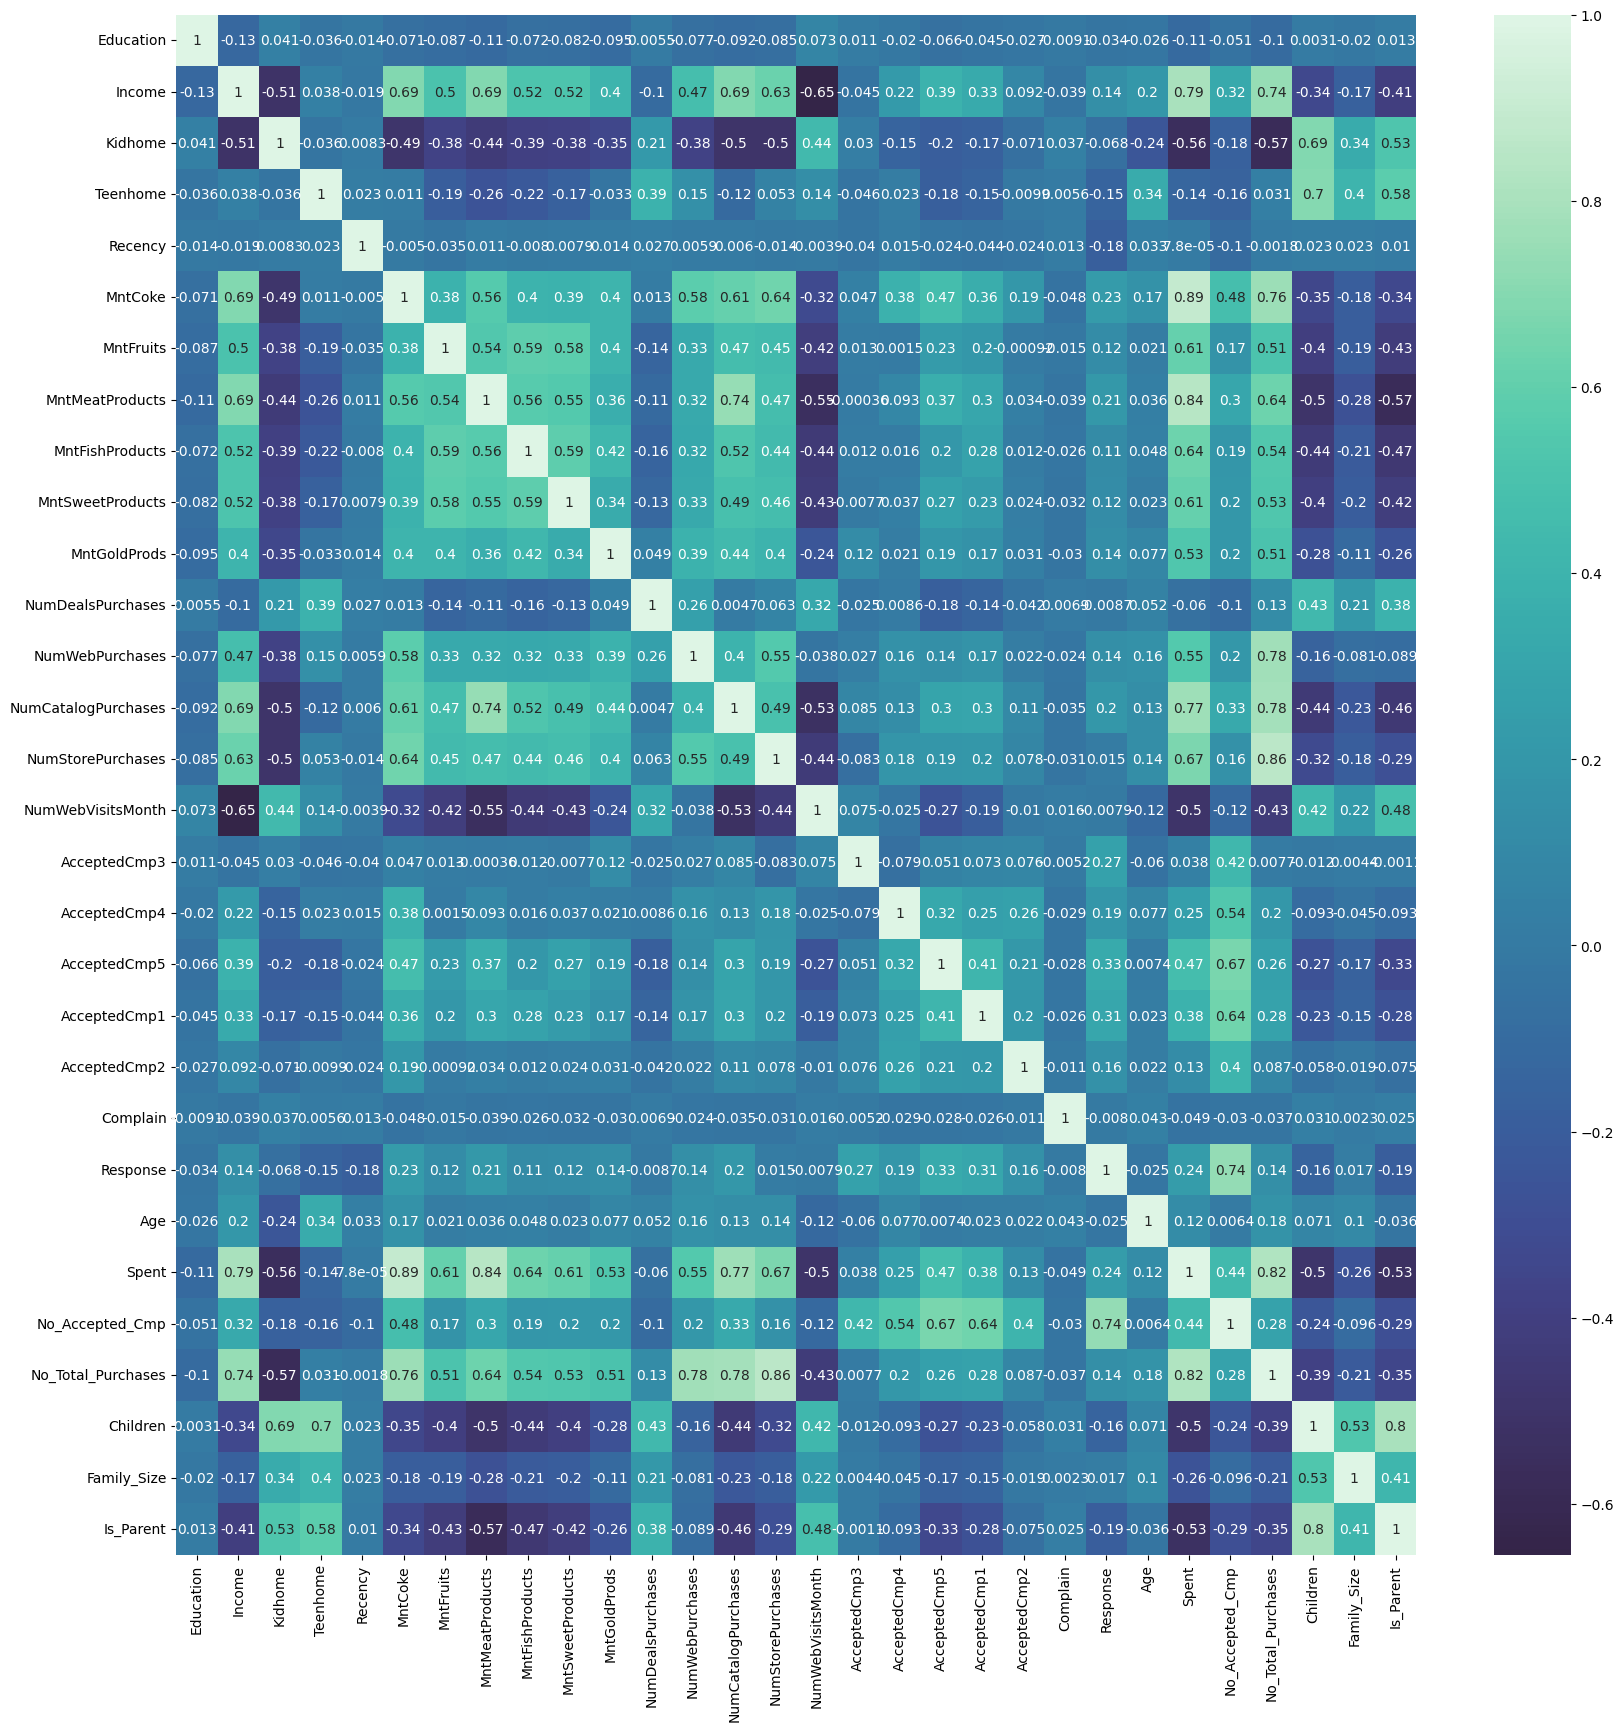

In [39]:
corr_matrix=df.select_dtypes(include=["int32","float64","int64"]).corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix, annot = True, cmap = 'mako', center = 0)
     

# Feature Scaling

In this section, numerical features are scaled.

In [40]:
scalar = StandardScaler()
scaled_df =scalar.fit_transform(df)

# Dimensionality Reduction

In [41]:
p = PCA(n_components=2)
p.fit(df)

PCA(n_components=2)

In [43]:
p.explained_variance_

array([4.61806782e+14, 1.86477641e+11])

In [44]:
p.explained_variance_ratio_

array([9.99506912e-01, 4.03601025e-04])

In [45]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,3), columns=['Explained Variability'])

,Explained Variability
1,0.999507
2,0.000404


In [46]:
p.explained_variance_ratio_.cumsum()

array([0.99950691, 0.99991051])

In [47]:
df_PCA = pd.DataFrame(p.transform(df), columns=(['col1', 'col2']))

In [48]:
df_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1663.0,2.473073e-09,2.148969e+07,-5.028542e+07,-1.633283e+07,-760911.951100,1.612691e+07,1.103309e+08
col2,1663.0,9.352428e-11,4.318306e+05,-2.424010e+06,-2.296310e+05,44193.434526,2.643423e+05,3.413519e+06


# Finding 'k' value by Elbow Method

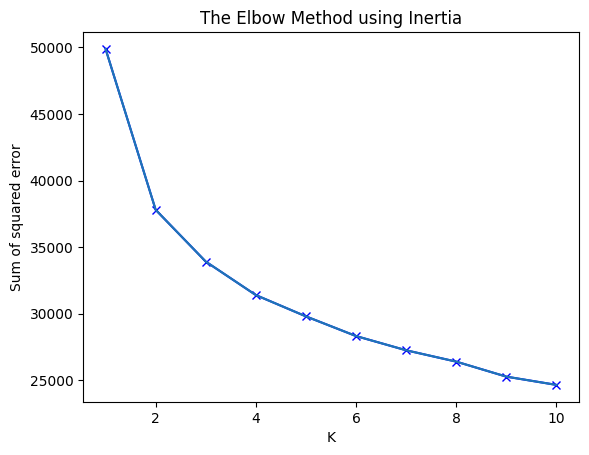

In [50]:
inertia=[]
range_val = range(1,11)
for i in range_val:
    km = KMeans(n_clusters=i)
    km.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(km.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method using Inertia')
plt.plot(range_val,inertia)

# Model Building using KMeans

In [52]:
kmeans_model = KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([df_PCA,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

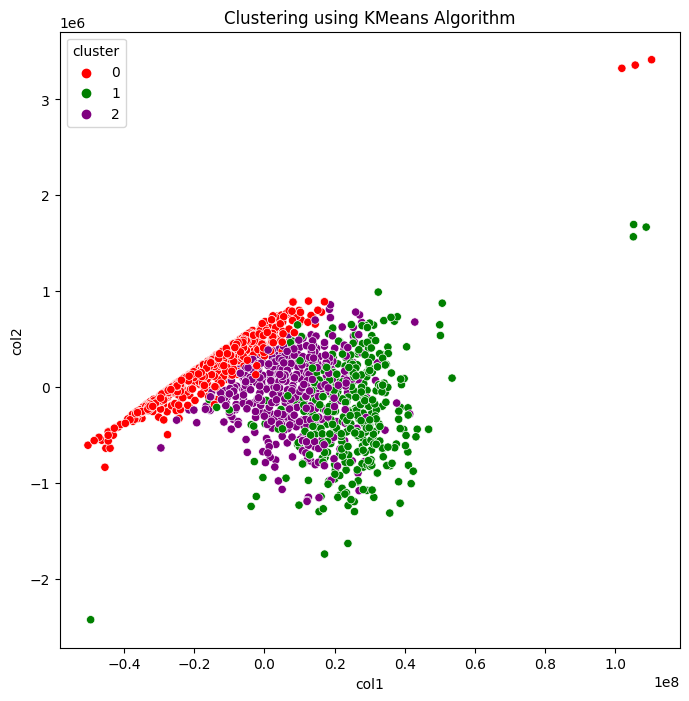

In [53]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='col1', y='col2',hue='cluster',data=pca_df_kmeans,palette=['red','green','purple'])
plt.title('Clustering using KMeans Algorithm')
plt.show()

In [54]:
#find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
#inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent
0,1.045455,3.545860e+07,0.792929,0.450758,49.516414,44287.878788,5157.828283,24429.292929,7518.939394,5189.393939,16026.515152,2.092172,2.165404,0.578283,3.256313,6.465909,0.077020,0.010101,-5.551115e-17,0.001263,0.002525,0.013889,0.093434,43.486111,1.026098e+05,0.184343,6.000000,1.243687,2.368687,0.878788
1,0.748111,7.654435e+07,0.022670,0.055416,48.413098,623476.070529,64161.209068,465707.808564,95178.841310,67924.433249,73692.695214,1.171285,4.969773,6.166247,8.196474,2.670025,0.085642,0.146096,2.745592e-01,0.229219,0.037783,0.005038,0.304786,47.093199,1.390141e+06,1.078086,19.332494,0.078086,1.244332,0.078086
2,0.862869,5.913192e+07,0.232068,0.951477,48.843882,477552.742616,28786.919831,153122.362869,37917.721519,29094.936709,63525.316456,3.727848,6.388186,3.280591,8.035865,5.666667,0.052743,0.120253,1.476793e-02,0.023207,0.006329,0.008439,0.099156,49.814346,7.900000e+05,0.316456,17.704641,1.183544,2.322785,0.957806


In [56]:
#creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent,Cluster
0,0.0,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,1617000.0,1.0,22.0,0.0,2.0,0.0,1.0
1,0.0,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,27000.0,0.0,4.0,2.0,4.0,1.0,0.0
2,0.0,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,776000.0,0.0,20.0,0.0,1.0,0.0,1.0
3,0.0,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,53000.0,0.0,6.0,1.0,2.0,1.0,0.0
4,1.0,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,422000.0,0.0,14.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [57]:
cluster_df_cleaned = cluster_df.dropna()

In [59]:
cluster_df_cleaned

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent,Cluster
0,0.0,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,1617000.0,1.0,22.0,0.0,2.0,0.0,1.0
1,0.0,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,27000.0,0.0,4.0,2.0,4.0,1.0,0.0
2,0.0,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,776000.0,0.0,20.0,0.0,1.0,0.0,1.0
3,0.0,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,53000.0,0.0,6.0,1.0,2.0,1.0,0.0
4,1.0,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,422000.0,0.0,14.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,3.0,50334000.0,0.0,1.0,24.0,284000.0,16000.0,160000.0,84000.0,16000.0,134000.0,6.0,7.0,4.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,694000.0,0.0,17.0,1.0,2.0,1.0,0.0
1659,0.0,72066000.0,0.0,0.0,55.0,1003000.0,34000.0,536000.0,134000.0,51000.0,34000.0,1.0,4.0,6.0,6.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,34.0,1792000.0,3.0,16.0,0.0,2.0,0.0,0.0
1660,1.0,50729000.0,1.0,1.0,62.0,239000.0,13000.0,143000.0,45000.0,4000.0,52000.0,9.0,6.0,2.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,496000.0,0.0,15.0,2.0,4.0,1.0,0.0
1661,0.0,34916000.0,2.0,0.0,89.0,51000.0,23000.0,82000.0,33000.0,0.0,42000.0,4.0,5.0,1.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,231000.0,0.0,9.0,2.0,3.0,1.0,0.0


In [60]:
cluster1_df=cluster_df_cleaned[cluster_df_cleaned['Cluster']==0]
cluster1_df.head(5)

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent,Cluster
1,0.0,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,27000.0,0.0,4.0,2.0,4.0,1.0,0.0
3,0.0,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,53000.0,0.0,6.0,1.0,2.0,1.0,0.0
7,1.0,33454000.0,1.0,0.0,32.0,76000.0,10000.0,56000.0,3000.0,1000.0,23000.0,2.0,4.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,169000.0,0.0,8.0,1.0,1.0,1.0,0.0
8,1.0,30351000.0,1.0,0.0,19.0,14000.0,0.0,24000.0,3000.0,3000.0,2000.0,1.0,3.0,0.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41.0,46000.0,1.0,5.0,1.0,2.0,1.0,0.0
9,1.0,5648000.0,1.0,1.0,68.0,28000.0,0.0,6000.0,1000.0,1000.0,13000.0,1.0,1.0,0.0,0.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,49000.0,1.0,1.0,2.0,3.0,1.0,0.0


In [62]:
cluster2_df=cluster_df_cleaned[cluster_df_cleaned['Cluster']==1]
cluster2_df

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent,Cluster
0,0.0,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,1617000.0,1.0,22.0,0.0,2.0,0.0,1.0
2,0.0,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,776000.0,0.0,20.0,0.0,1.0,0.0,1.0
11,4.0,7500000.0,0.0,0.0,59.0,6000.0,16000.0,11000.0,11000.0,1000.0,16000.0,1.0,2.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,61000.0,0.0,5.0,0.0,0.0,0.0,1.0
14,0.0,17323000.0,0.0,0.0,38.0,3000.0,14000.0,17000.0,6000.0,1000.0,5000.0,1.0,1.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,46000.0,0.0,4.0,0.0,0.0,0.0,1.0
20,0.0,37040000.0,0.0,0.0,41.0,86000.0,2000.0,73000.0,69000.0,38000.0,48000.0,1.0,4.0,2.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,316000.0,0.0,11.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,0.0,56386000.0,1.0,1.0,51.0,230000.0,48000.0,214000.0,13000.0,32000.0,75000.0,8.0,9.0,1.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,612000.0,0.0,17.0,2.0,3.0,1.0,1.0
1652,0.0,34213000.0,1.0,1.0,2.0,50000.0,4000.0,28000.0,6000.0,3000.0,26000.0,3.0,3.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,117000.0,1.0,6.0,2.0,6.0,1.0,1.0
1654,1.0,25358000.0,0.0,1.0,57.0,19000.0,0.0,5000.0,0.0,0.0,8000.0,2.0,1.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,32000.0,0.0,4.0,1.0,5.0,1.0,1.0
1655,2.0,35544000.0,1.0,0.0,77.0,30000.0,5000.0,23000.0,4000.0,1000.0,4000.0,1.0,2.0,0.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,67000.0,0.0,5.0,1.0,3.0,1.0,1.0


In [63]:
cluster3_df=cluster_df_cleaned[cluster_df_cleaned['Cluster']==2]
cluster3_df

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent,Cluster
4,1.0,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,422000.0,0.0,14.0,1.0,1.0,1.0,2.0
5,2.0,62513000.0,0.0,1.0,16.0,520000.0,42000.0,98000.0,0.0,42000.0,14000.0,2.0,6.0,4.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,716000.0,0.0,20.0,1.0,2.0,1.0,2.0
6,0.0,55635000.0,0.0,1.0,34.0,235000.0,65000.0,164000.0,50000.0,49000.0,27000.0,4.0,7.0,3.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,590000.0,0.0,17.0,1.0,4.0,1.0,2.0
17,0.0,37760000.0,0.0,0.0,20.0,84000.0,5000.0,38000.0,150000.0,12000.0,28000.0,2.0,4.0,1.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,317000.0,0.0,11.0,0.0,1.0,0.0,2.0
21,0.0,2447000.0,1.0,0.0,42.0,1000.0,1000.0,1725000.0,1000.0,1000.0,1000.0,15.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1730000.0,0.0,28.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,4.0,24594000.0,1.0,0.0,94.0,1000.0,3000.0,6000.0,10000.0,0.0,9000.0,1.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,29000.0,0.0,4.0,1.0,2.0,1.0,2.0
1645,2.0,39228000.0,0.0,0.0,1.0,7000.0,1000.0,6000.0,0.0,3000.0,3000.0,1.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,20000.0,0.0,3.0,0.0,3.0,0.0,2.0
1649,1.0,56551000.0,1.0,1.0,48.0,67000.0,4000.0,32000.0,17000.0,2000.0,16000.0,3.0,2.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,138000.0,0.0,7.0,2.0,6.0,1.0,2.0
1651,0.0,82014000.0,0.0,0.0,48.0,980000.0,37000.0,265000.0,35000.0,163000.0,31000.0,1.0,3.0,6.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.0,1511000.0,1.0,21.0,0.0,2.0,0.0,2.0


# Clusters Analysis and Customers Profiling

<Axes: xlabel='Cluster', ylabel='count'>

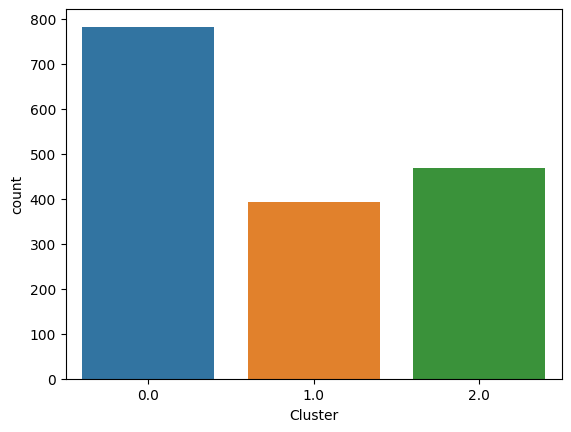

In [66]:
#vishvalization
sns.countplot(x='Cluster', data=cluster_df_cleaned)

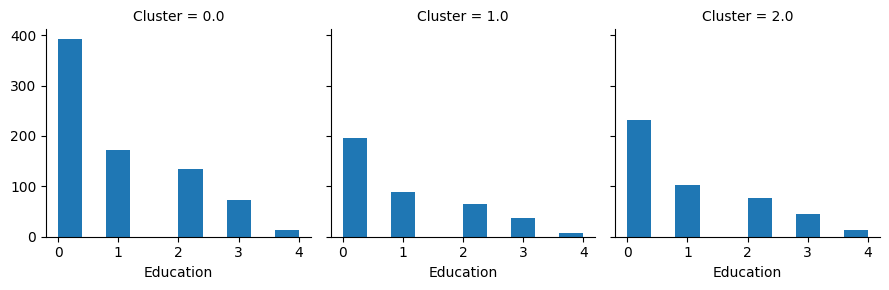

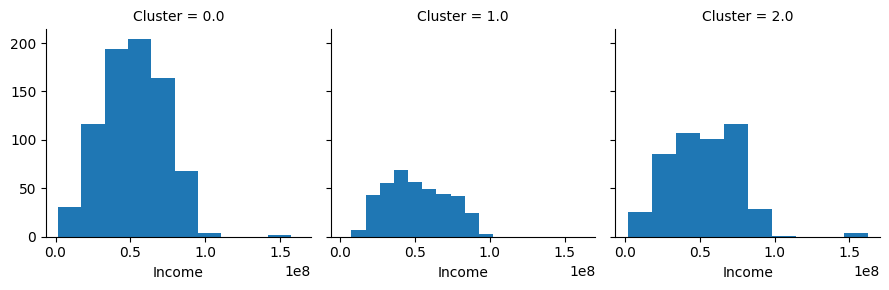

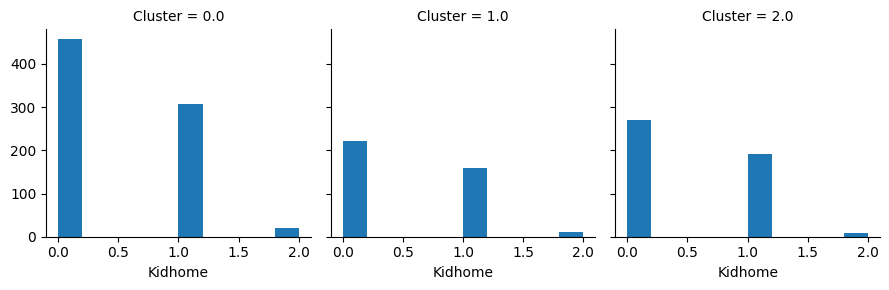

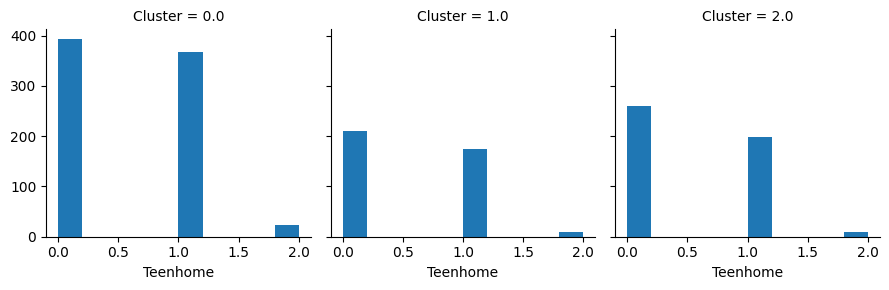

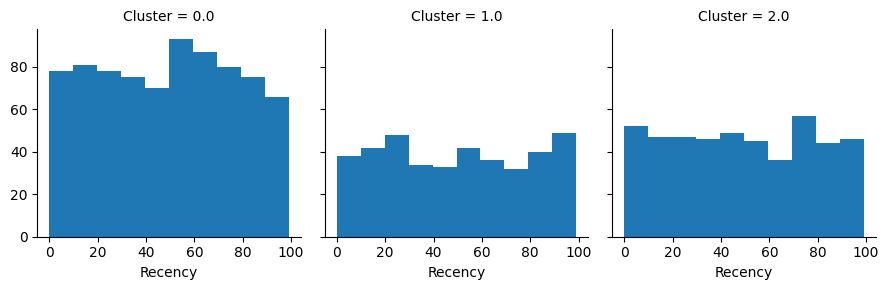

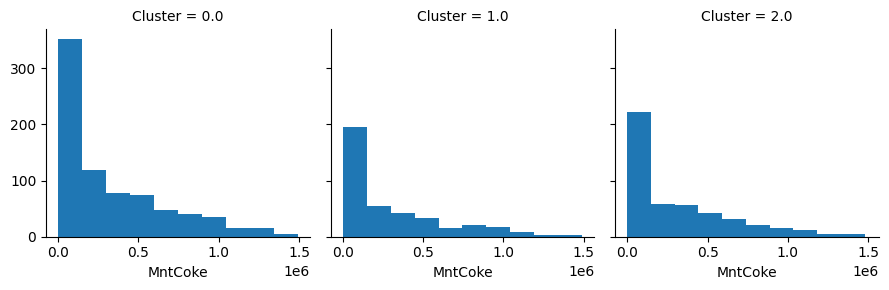

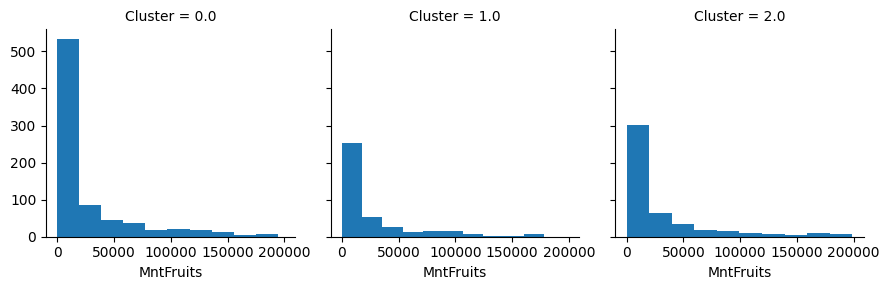

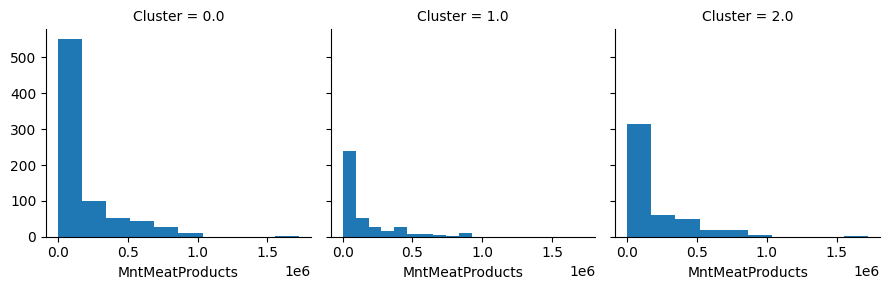

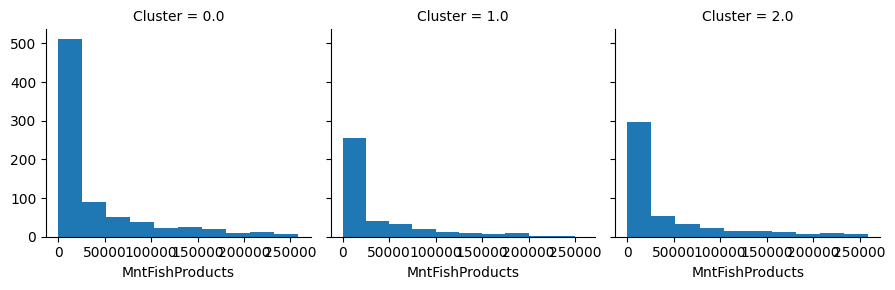

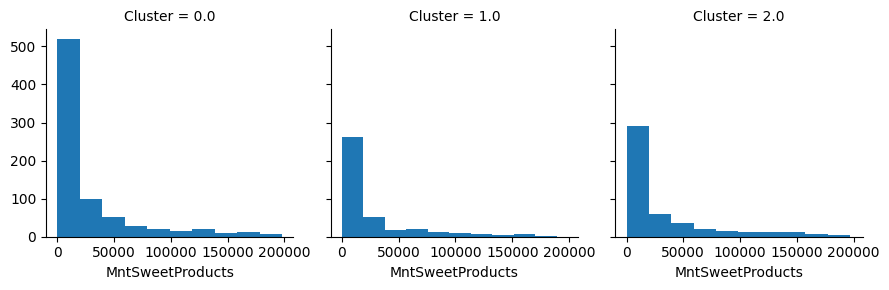

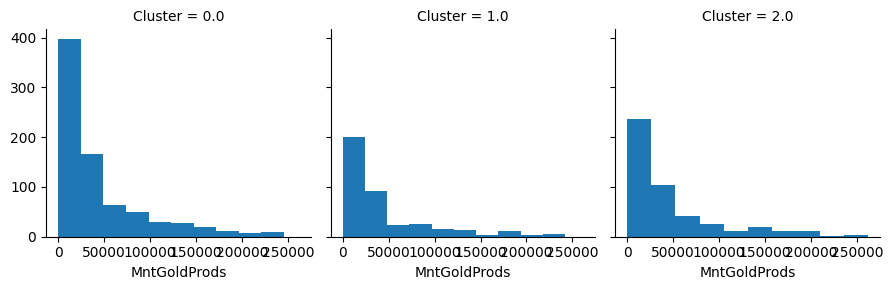

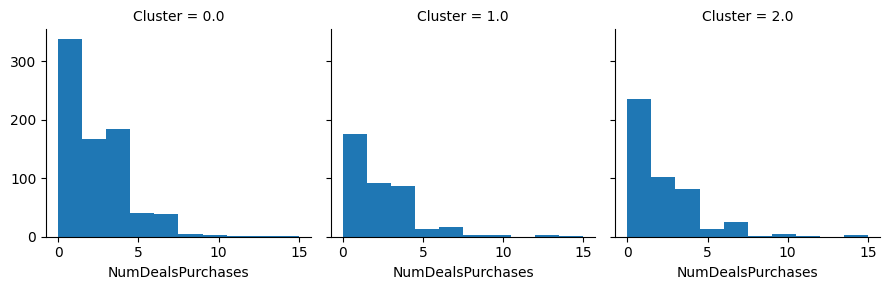

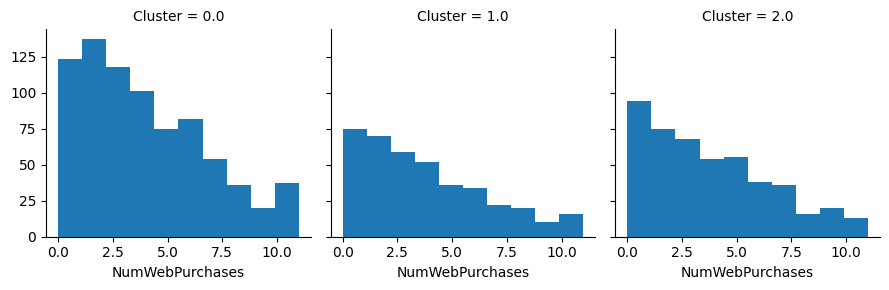

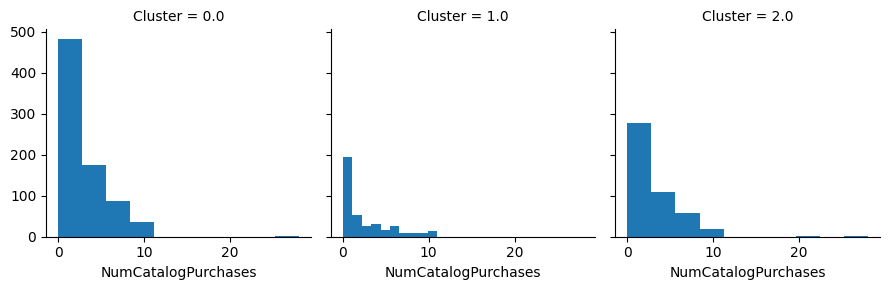

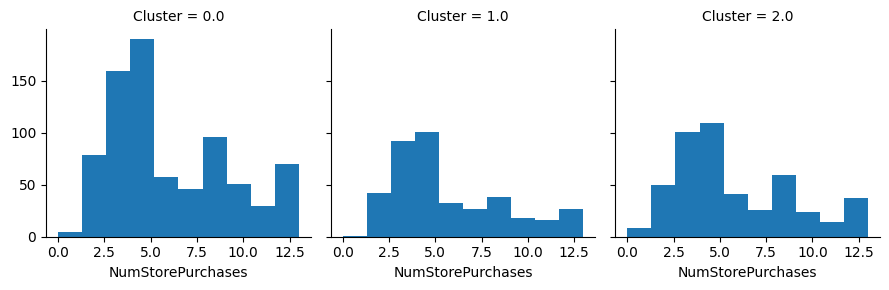

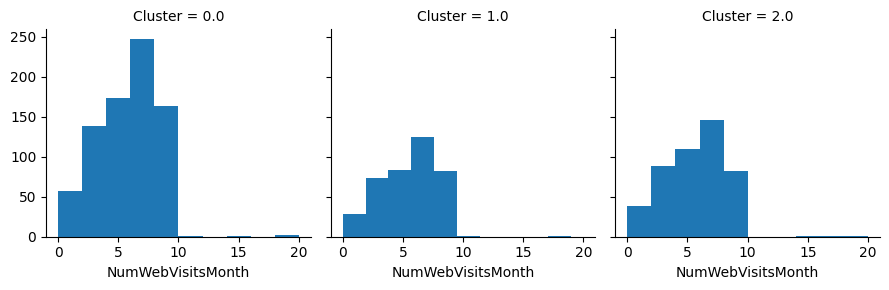

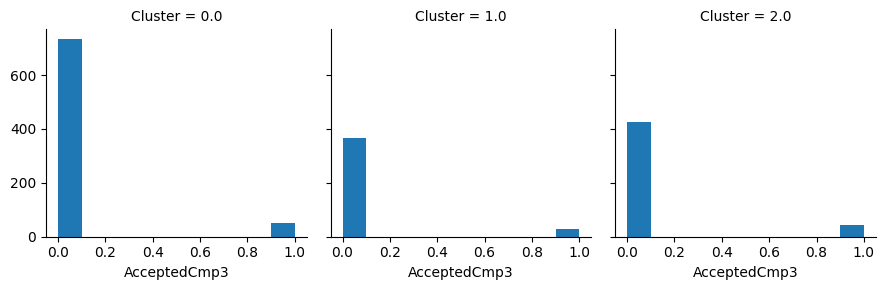

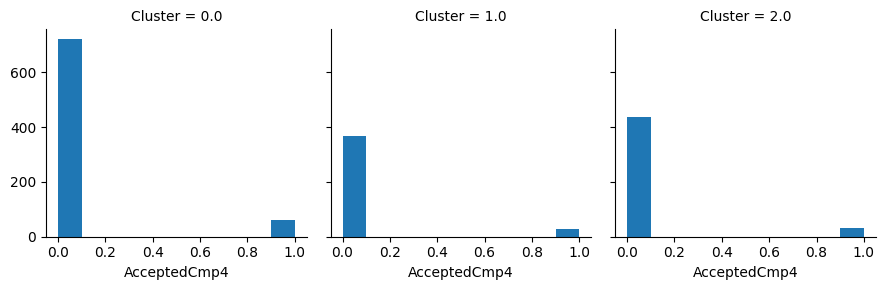

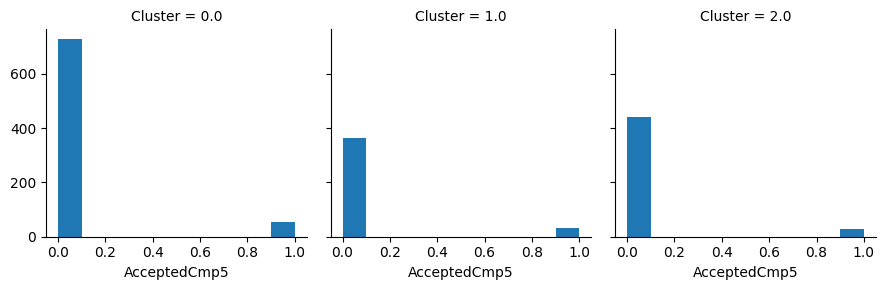

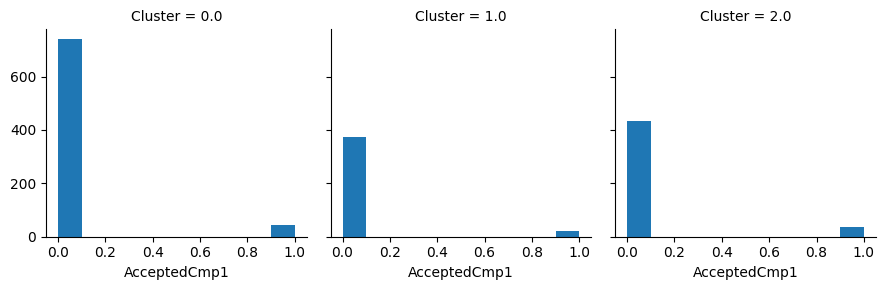

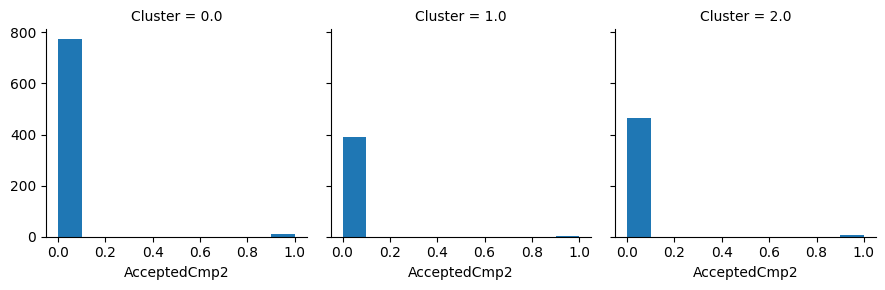

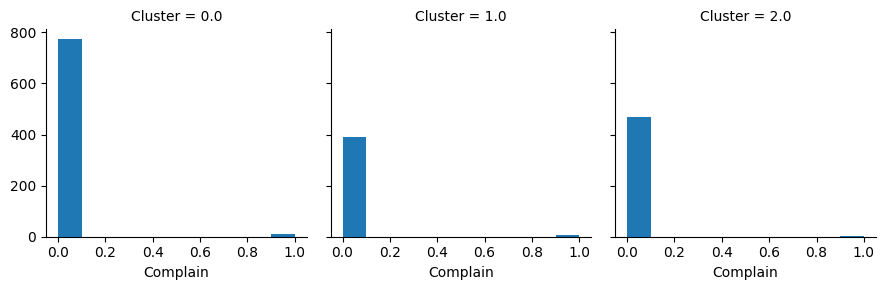

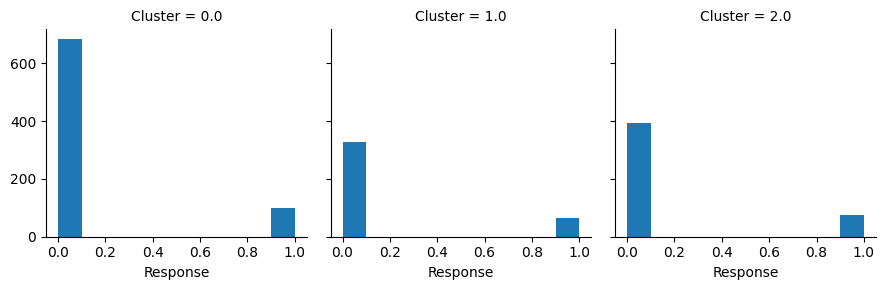

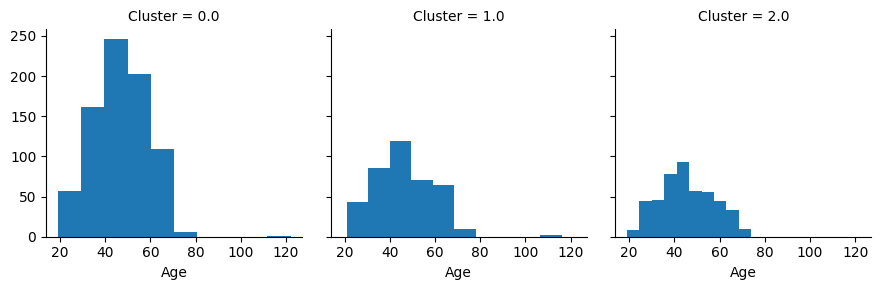

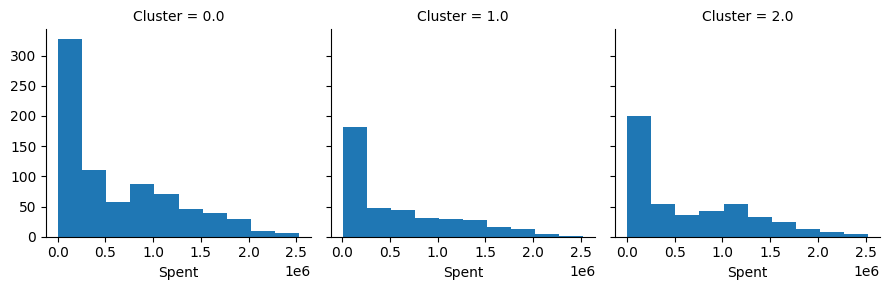

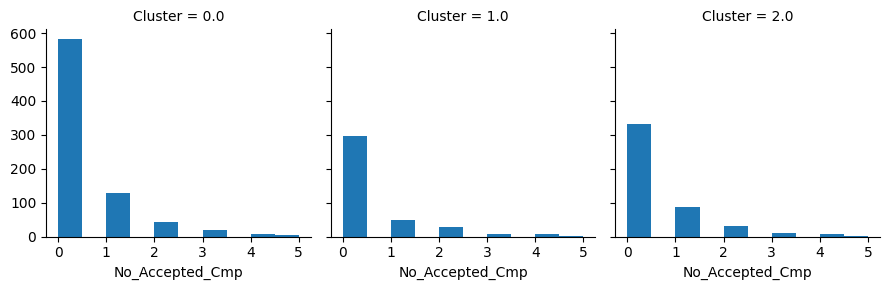

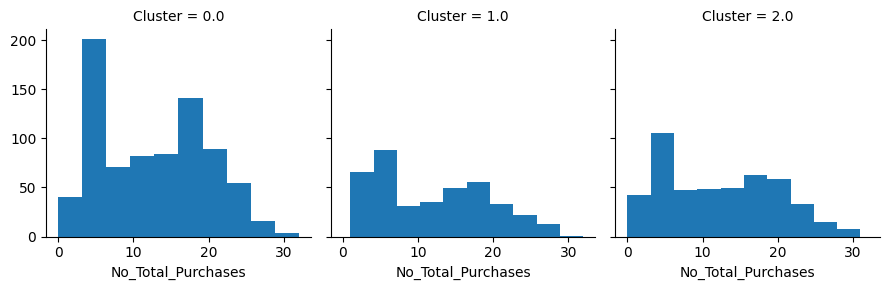

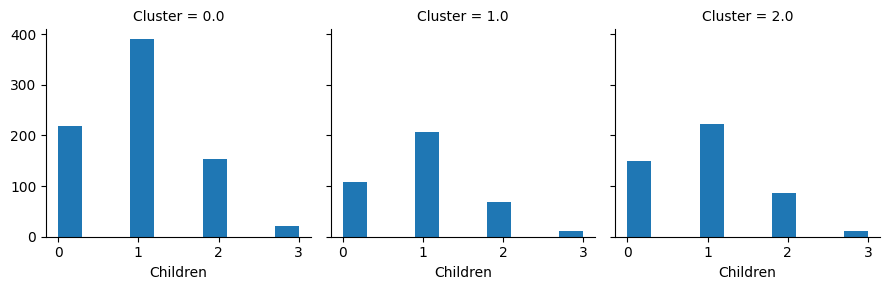

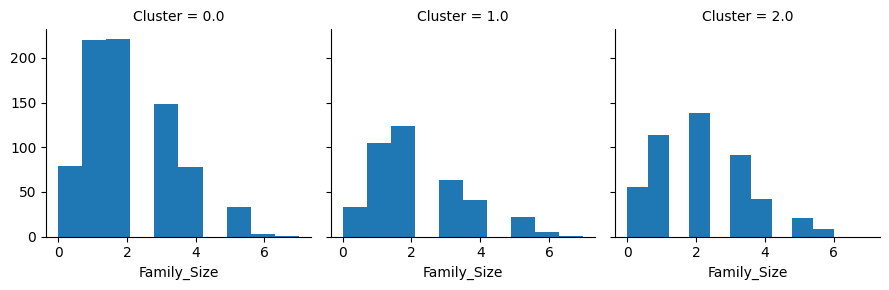

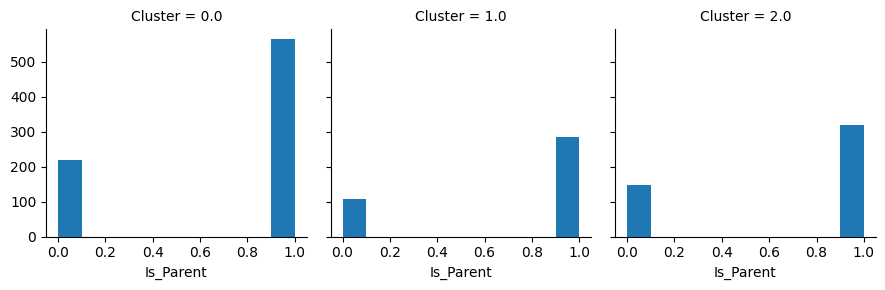

In [67]:
for c in cluster_df_cleaned.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df_cleaned,col='Cluster')
    grid= grid.map(plt.hist,c)
plt.show()

In [68]:
#saving scikitlearn models
import joblib
joblib.dump(kmeans_model,"kmean_model.pkl")

['kmean_model.pkl']

# Training and testing the model accuracy using decision tree

In [69]:
#split dataset
x=cluster_df_cleaned.drop(['Cluster'],axis=1)
y=cluster_df_cleaned[['Cluster']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
X_train

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent
832,1.0,56575000.0,0.0,2.0,42.0,421000.0,5000.0,90000.0,0.0,16000.0,10000.0,3.0,7.0,3.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,542000.0,0.0,17.0,2.0,3.0,1.0
1035,0.0,28071000.0,0.0,0.0,65.0,39000.0,33000.0,130000.0,41000.0,26000.0,44000.0,2.0,5.0,1.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,313000.0,0.0,11.0,0.0,2.0,0.0
1062,1.0,42000000.0,0.0,0.0,23.0,124000.0,83000.0,267000.0,85000.0,59000.0,35000.0,2.0,5.0,2.0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,653000.0,1.0,18.0,0.0,2.0,0.0
705,0.0,71952000.0,1.0,0.0,93.0,656000.0,80000.0,455000.0,52000.0,107000.0,93000.0,2.0,8.0,4.0,8.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,29.0,1443000.0,2.0,20.0,1.0,1.0,1.0
557,0.0,79908000.0,0.0,0.0,30.0,557000.0,129000.0,761000.0,29000.0,185000.0,111000.0,1.0,5.0,6.0,7.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0,1772000.0,1.0,18.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1.0,33419000.0,0.0,1.0,76.0,56000.0,0.0,12000.0,0.0,0.0,18000.0,2.0,2.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,86000.0,0.0,6.0,1.0,3.0,1.0
1307,1.0,81051000.0,0.0,0.0,43.0,1142000.0,29000.0,249000.0,38000.0,29000.0,14000.0,1.0,5.0,5.0,12.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,50.0,1501000.0,2.0,22.0,0.0,0.0,0.0
873,3.0,42395000.0,1.0,1.0,35.0,48000.0,13000.0,57000.0,24000.0,15000.0,25000.0,4.0,3.0,1.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,182000.0,0.0,8.0,2.0,4.0,1.0
1476,2.0,64857000.0,0.0,0.0,78.0,556000.0,14000.0,717000.0,210000.0,0.0,43000.0,1.0,7.0,5.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1540000.0,0.0,22.0,0.0,2.0,0.0


In [71]:
X_test

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,No_Accepted_Cmp,No_Total_Purchases,Children,Family_Size,Is_Parent
693,4.0,13084000.0,0.0,0.0,29.0,2000.0,0.0,7000.0,3000.0,7000.0,10000.0,1.0,1.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,29000.0,0.0,4.0,0.0,1.0,0.0
1584,0.0,81361000.0,0.0,0.0,18.0,163000.0,23000.0,424000.0,27000.0,65000.0,76000.0,1.0,3.0,10.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,778000.0,1.0,26.0,0.0,3.0,0.0
737,2.0,70545000.0,0.0,1.0,29.0,138000.0,39000.0,63000.0,55000.0,18000.0,21000.0,1.0,4.0,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,334000.0,0.0,12.0,1.0,2.0,1.0
1155,1.0,23091000.0,1.0,1.0,98.0,35000.0,0.0,11000.0,0.0,0.0,2000.0,4.0,2.0,1.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,48000.0,0.0,6.0,2.0,4.0,1.0
1286,1.0,57091000.0,0.0,1.0,82.0,462000.0,0.0,24000.0,6000.0,0.0,4000.0,2.0,9.0,2.0,5.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,43.0,496000.0,2.0,16.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.0,30833000.0,1.0,1.0,33.0,11000.0,0.0,7000.0,3000.0,1000.0,6000.0,2.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,28000.0,0.0,4.0,2.0,2.0,1.0
203,1.0,102160000.0,0.0,0.0,54.0,763000.0,29000.0,138000.0,76000.0,176000.0,58000.0,0.0,7.0,9.0,10.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,38.0,1240000.0,4.0,26.0,0.0,1.0,0.0
322,1.0,47025000.0,1.0,1.0,6.0,16000.0,0.0,3000.0,0.0,0.0,1000.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,20000.0,0.0,3.0,2.0,5.0,1.0
595,2.0,17459000.0,1.0,0.0,12.0,6000.0,4000.0,16000.0,3000.0,10000.0,30000.0,3.0,3.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,69000.0,1.0,6.0,1.0,2.0,1.0


In [73]:
#Decision_Tree
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [80]:
accuracy_score(y_test, y_pred)

0.3090909090909091

confusion_matrix

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[77, 37, 55],
       [40, 12, 27],
       [41, 28, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

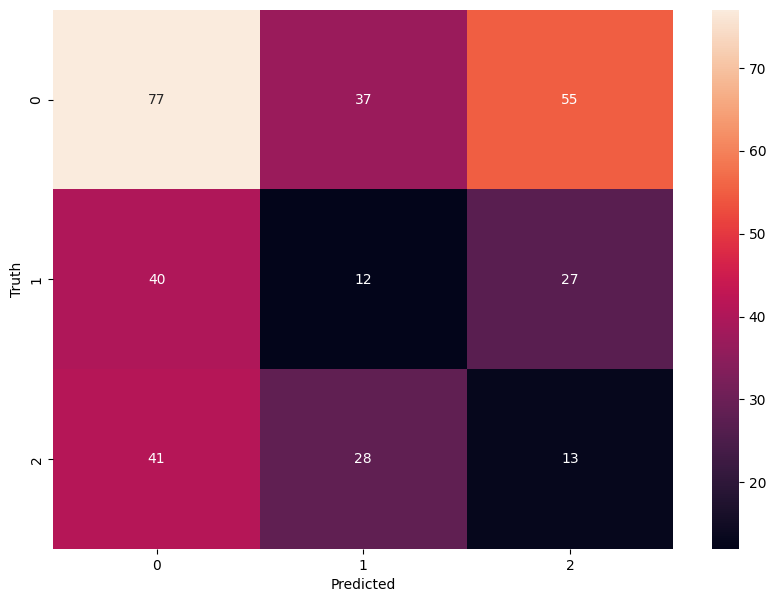

In [79]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
model.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy')

In [90]:
X =cluster_df_cleaned.drop(columns=['Cluster'])
y =cluster_df_cleaned['Cluster']

In [91]:
#Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
log_reg =LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

Measure accuracy of our model

In [97]:
model.score(X_test, y_test)

0.990909090909091

In [98]:
#Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
#Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%

rclf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.3181818181818182

In [100]:
#Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4090909090909091

In [101]:
#Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.41818181818181815

In [102]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.37272727272727274